In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [4]:
root_dir = "./run_history"

In [77]:
run_history = {}
# ind = 0
for f in os.listdir(root_dir):
    fn = os.path.join(root_dir, f)
    with open(fn, 'r') as j:
        run_dict = json.load(j)
        name = f.split('.')[0]
        run_history[name] = run_dict
#         ind += 1

In [78]:
run_history.keys()

dict_keys(['model4', 'model8', 'model9', 'model3', 'model7', 'model2', 'model1', 'model6', 'model5'])

In [84]:
run_history['model9'].keys()

dict_keys(['run-0', 'run-1', 'run-2', 'run-3'])

In [85]:
run_history['model9']['run-0']['output']

{'loss': [20.558990478515625,
  8.590449333190918,
  11.725119590759277,
  4.499031066894531,
  5.787380218505859,
  3.8198864459991455,
  3.975504159927368,
  3.6919713020324707,
  2.6009681224823,
  3.2430219650268555,
  3.0281052589416504,
  2.0596158504486084,
  2.3073627948760986,
  2.1683573722839355,
  1.5882155895233154,
  1.9741564989089966,
  1.8628065586090088,
  1.3744959831237793,
  1.7336782217025757,
  1.4705320596694946,
  1.312037467956543,
  1.5181430578231812,
  1.1415963172912598,
  1.2844500541687012,
  1.1977510452270508,
  1.1036428213119507,
  1.2544312477111816,
  1.0105394124984741,
  1.1748632192611694,
  0.9911710619926453,
  1.0313749313354492,
  1.0258569717407227,
  0.917476236820221,
  1.0201239585876465,
  0.8893210887908936,
  0.9660987257957458,
  0.8995083570480347,
  0.8897907137870789,
  0.8986682891845703,
  0.8476258516311646,
  0.8906845450401306,
  0.8277042508125305,
  0.8713181614875793,
  0.8199448585510254,
  0.8403483629226685,
  0.8165028

In [79]:
whole_list = []
for n, mainkey in enumerate(run_history.keys()):
    session_list = []
    for key in run_history[mainkey].keys():
        s = pd.Series(run_history[mainkey][key]['params'])
        s['run_num'] = key
        s['model_num'] = mainkey
        session_list.append(s)
        
    whole_list.append(pd.concat(session_list, axis=1).T)

In [80]:
params_df = pd.concat(whole_list).reset_index(drop=True)

In [81]:
params_df.head(10)

,HP_NUM_UNITS,HP_DROPOUT,HP_LEARNING_RATE,HP_REGULARIZER,batch_size,n_epochs,run_num,model_num
0,64.0,0.3,0.01,0.1,388607.0,20.0,run-0,model4
1,64.0,0.3,0.01,0.01,388607.0,20.0,run-1,model4
2,64.0,0.4,0.01,0.1,388607.0,20.0,run-2,model4
3,64.0,0.4,0.01,0.01,388607.0,20.0,run-3,model4
4,64.0,0.5,0.01,0.1,388607.0,20.0,run-4,model4
5,64.0,0.5,0.01,0.01,388607.0,20.0,run-5,model4
6,32.0,0.2,0.1,0.1,388607.0,100.0,run-0,model8
7,32.0,0.2,0.01,0.1,388607.0,100.0,run-1,model8
8,32.0,0.4,0.1,0.1,388607.0,100.0,run-2,model8
9,32.0,0.4,0.01,0.1,388607.0,100.0,run-3,model8


In [57]:
len(params_df)

80

In [82]:
whole_list = []
for mainkey in run_history.keys():
    session_list = []
    for key in run_history[mainkey].keys():
        df = pd.DataFrame(run_history[mainkey][key]['output']).T.reset_index()
        df.rename(columns={'index': 'output_type'})
        df['run_num'] = key
        df['model_num'] = mainkey
        cols = df.columns.tolist()
        cols = cols[-2:] + cols[:-2]
        df = df[cols]
        session_list.append(df)
    whole_list.append(pd.concat(session_list, axis=0))
        

In [86]:
output_df = pd.concat(whole_list,axis=0)

In [114]:
output_df[output_df.model_num=='model9']

,run_num,model_num,index,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,run-0,model9,loss,20.558990,8.590449,11.725120,4.499031,5.787380,3.819886,3.975504,...,0.725899,0.724930,0.723423,0.724256,0.724073,0.722174,0.721845,0.720661,0.719947,0.718856
1,run-0,model9,root_mean_squared_error,3.923943,2.665876,3.101690,1.602485,1.965981,1.409617,1.441808,...,0.792147,0.793087,0.790784,0.791596,0.792952,0.791001,0.790288,0.791112,0.790439,0.789102
2,run-0,model9,val_loss,8.563185,10.953571,4.430439,5.717554,3.697073,3.671839,3.413039,...,0.906125,0.911205,0.910481,0.905554,0.908050,0.910684,0.906109,0.907302,0.909972,0.905028
3,run-0,model9,val_root_mean_squared_error,2.660757,2.974715,1.580939,1.948141,1.365359,1.332345,1.314917,...,0.900101,0.901733,0.901581,0.900141,0.900865,0.901884,0.900726,0.901192,0.902107,0.900591
0,run-1,model9,loss,20.448250,8.512430,10.941110,5.347922,5.771541,3.676522,4.110834,...,0.778418,0.777348,0.775987,0.774287,0.774214,0.772657,0.772385,0.771407,0.769393,0.767489
1,run-1,model9,root_mean_squared_error,3.922504,2.653646,2.963486,1.797877,1.947926,1.372049,1.542974,...,0.829543,0.828567,0.827084,0.827055,0.827987,0.826490,0.825936,0.826077,0.825381,0.823717
2,run-1,model9,val_loss,8.457376,9.707564,5.214656,5.655807,3.432923,3.579956,2.969155,...,0.898395,0.900573,0.898197,0.896180,0.897621,0.898787,0.896681,0.895809,0.897473,0.897783
3,run-1,model9,val_root_mean_squared_error,2.643253,2.747491,1.760425,1.917989,1.280203,1.360107,1.240970,...,0.898649,0.899252,0.898849,0.898626,0.898916,0.899206,0.898709,0.898704,0.899163,0.899366
0,run-2,model9,loss,21.025486,7.790965,22.931751,6.423280,7.760972,5.736934,7.049380,...,0.750060,0.765650,0.765184,0.745430,0.738404,0.747156,0.752416,0.746803,0.734334,0.732143
1,run-2,model9,root_mean_squared_error,3.929937,2.368939,4.356327,1.682238,2.011459,1.259860,1.515140,...,0.788378,0.786299,0.801764,0.778119,0.777408,0.789675,0.782315,0.790931,0.776627,0.776364


In [116]:
output_df[output_df['index']=='val_root_mean_squared_error'][[col for col in output_df.columns if type(col) != str]]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
3,3.830990,3.733922,3.619684,3.479292,3.304268,3.086962,2.820497,2.499647,2.123764,1.705190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.847142,3.756531,3.640496,3.489259,3.295743,3.054004,2.758680,2.406424,1.999844,1.560681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.877341,3.812722,3.739679,3.653129,3.547888,3.418183,3.257828,3.060655,2.821081,2.534729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.858073,3.769270,3.653735,3.503592,3.313887,3.079791,2.796349,2.460040,2.072369,1.649220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.858793,3.779042,3.688954,3.581725,3.450846,3.289961,3.092861,2.853695,2.567810,2.233396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,3.834666,3.742632,3.637068,3.510299,3.355033,3.164567,2.932852,2.654662,2.326633,1.951081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.896477,3.887695,3.878635,3.869382,3.859964,3.850380,3.840623,3.830681,3.820538,3.810179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.465759,3.628252,1.883519,2.252189,1.559551,1.248087,1.463517,1.091747,1.249185,1.506334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.821895,3.709423,3.573590,3.405885,3.197136,2.936816,2.614364,2.222878,1.768711,1.306052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
min_rmse = pd.DataFrame(columns=['min_rmse', 'min_epoch'])

for n, row in enumerate(output_df[output_df['index']=='val_root_mean_squared_error'][[col for col in output_df.columns if type(col) != str]].values):
    min_rmse.at[n, 'min_rmse'] = np.nanmin(row)
    min_rmse.at[n, 'min_epoch'] = np.where(row==np.nanmin(row))[0][0]

In [118]:
min_rmse

,min_rmse,min_epoch
0,0.92492,19
1,0.922503,19
2,1.055718,14
3,0.936912,19
4,1.048383,13
...,...,...
75,0.990947,19
76,3.690826,19
77,0.92147,17
78,0.943918,18


In [120]:
params_df = pd.concat([params_df, min_rmse], axis=1)

In [124]:
params_df.sort_values(by='min_rmse').head(10)

,HP_NUM_UNITS,HP_DROPOUT,HP_LEARNING_RATE,HP_REGULARIZER,batch_size,n_epochs,run_num,model_num,min_rmse,min_epoch
25,128.0,0.3,0.01,0.1,388607.0,100.0,run-2,model7,0.894889,56
8,32.0,0.4,0.1,0.1,388607.0,100.0,run-2,model8,0.895188,29
70,128.0,0.3,0.1,0.1,388607.0,100.0,run-2,model6,0.896324,49
6,32.0,0.2,0.1,0.1,388607.0,100.0,run-0,model8,0.897804,53
11,128.0,0.6,0.1,0.1,388607.0,100.0,run-1,model9,0.898331,82
69,64.0,0.3,0.1,0.1,388607.0,100.0,run-1,model6,0.898364,54
10,128.0,0.4,0.1,0.1,388607.0,100.0,run-0,model9,0.898933,62
68,32.0,0.3,0.1,0.1,388607.0,100.0,run-0,model6,0.899725,99
24,64.0,0.3,0.01,0.1,388607.0,100.0,run-1,model7,0.902956,93
12,256.0,0.4,0.1,0.1,388607.0,100.0,run-2,model9,0.903936,67


In [140]:
top_10 = []
for row in params_df.sort_values(by='min_rmse').head(10).index:
    model = params_df.at[row, 'model_num']
    run = params_df.at[row, 'run_num']
    train_rmse = output_df[(output_df.run_num==run) & (output_df.model_num==model) & (output_df['index']=='root_mean_squared_error')][[col for col in output_df.columns if type(col) != str]].values
    val_rmse = output_df[(output_df.run_num==run) & (output_df.model_num==model) & (output_df['index']=='val_root_mean_squared_error')][[col for col in output_df.columns if type(col) != str]].values
    top_10.append((train_rmse, val_rmse))

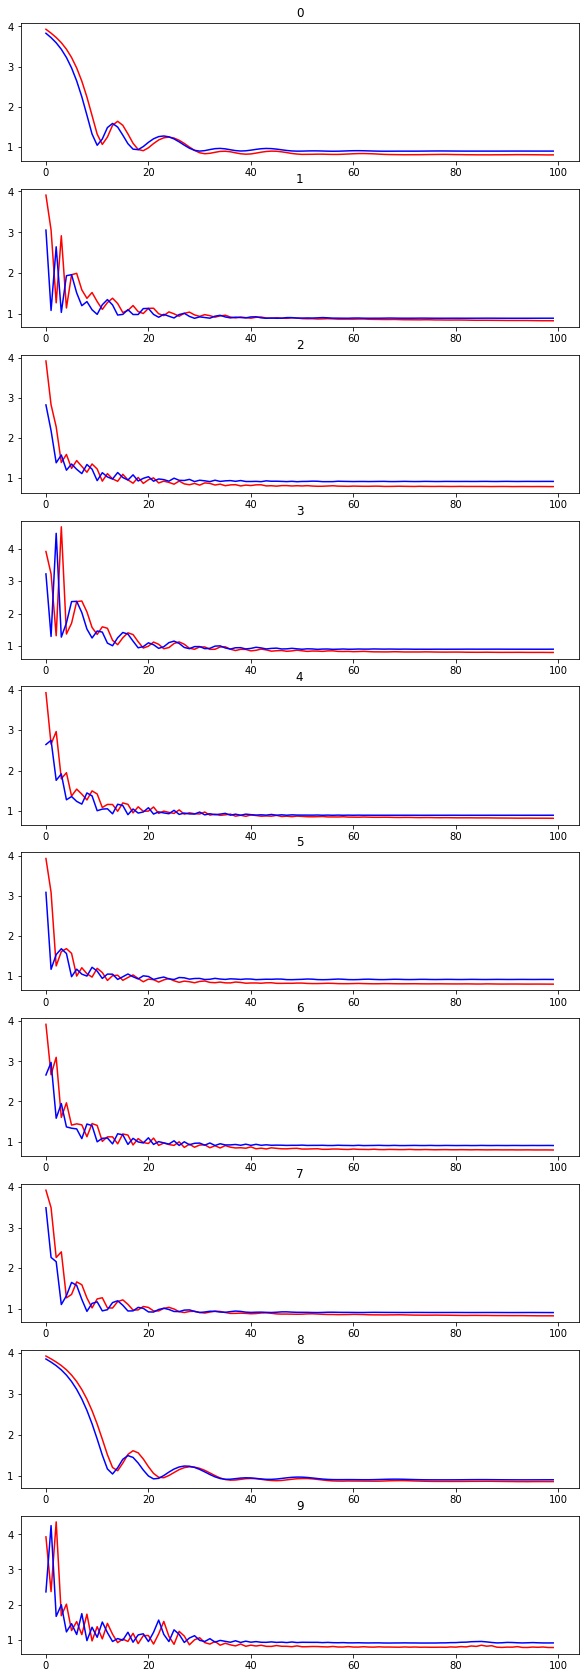

In [142]:
fig, axs = plt.subplots(nrows=10, figsize=(10, 30))

for n, pair in enumerate(top_10):
    axs[n].plot(pair[0][0], color='r')
    axs[n].plot(pair[1][0], color='b')
    axs[n].set_title(n)
    
plt.show()

In [125]:
top_10 = params_df.sort_values(by='min_rmse').head(10).index

In [128]:
output_df[(output_df['index']=='val_root_mean_squared_error')|(output_df['index']=='root_mean_squared_error')]

,run_num,model_num,index,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
1,run-0,model4,root_mean_squared_error,3.919286,3.834024,3.736304,3.621366,3.479810,3.303291,3.084512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,run-0,model4,val_root_mean_squared_error,3.830990,3.733922,3.619684,3.479292,3.304268,3.086962,2.820497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,run-1,model4,root_mean_squared_error,3.924040,3.850424,3.759140,3.642102,3.489201,3.293453,3.049787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,run-1,model4,val_root_mean_squared_error,3.847142,3.756531,3.640496,3.489259,3.295743,3.054004,2.758680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,run-2,model4,root_mean_squared_error,3.931247,3.880741,3.815778,3.742401,3.655380,3.549262,3.418932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,run-6,model5,val_root_mean_squared_error,2.465759,3.628252,1.883519,2.252189,1.559551,1.248087,1.463517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,run-7,model5,root_mean_squared_error,3.923919,3.825135,3.712146,3.575916,3.407155,3.197031,2.934012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,run-7,model5,val_root_mean_squared_error,3.821895,3.709423,3.573590,3.405885,3.197136,2.936816,2.614364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,run-8,model5,root_mean_squared_error,3.922589,3.914788,3.905635,3.895854,3.885725,3.875470,3.865178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
